## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [171]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [172]:
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv', sep=',')
data.shape

(1000, 21)

In [173]:
data.head()

status  duration  ... foreign_worker credit_risk
0  no checking account        18  ...             no        good
1  no checking account         9  ...             no        good
2           ... < 0 DM        12  ...             no        good
3  no checking account        12  ...            yes        good
4  no checking account        12  ...            yes        good

[5 rows x 21 columns]

In [174]:
data.tail()

status  ...  credit_risk
995                         no checking account  ...          bad
996                         no checking account  ...          bad
997  ... >= 200 DM / salary for at least 1 year  ...          bad
998                                  ... < 0 DM  ...          bad
999                         no checking account  ...          bad

[5 rows x 21 columns]

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [176]:
data.describe(include=['object'])

status  ... credit_risk
count                                         1000  ...        1000
unique                                           4  ...           2
top     ... >= 200 DM / salary for at least 1 year  ...        good
freq                                           394  ...         700

[4 rows x 18 columns]



1.   Пропуски: количество не наловых строк совпадает с общим, значит не введённых значений нет.
2.   Изходя из описания признаков (см. по ссылке) и количества уникальных значений можно считать, что признаки liable_people, telefone и foreign_worker, а также целевая переменная credit risk - бинарные. Duration, amount и age - числовые. Purpose, personal_status_sex, property , housing, job - категориальные. Остальные - порядковые.



### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [177]:
data.groupby(by=['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [178]:
# Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? 
# size = m*n, где m и n - количество строк и столбцов, 
# но так как количество столбцов одно и то же, то оно всё равно сокращается и поличается правильная попорцияя
print(f"Процент клиентов моложе 30 лет, снимающих жилье - {round(100 * data[(data['age'] < 30) & (data['housing'] == 'rent')].size / data[(data['age'] < 30)].size, 2)}")
print(f"Процент клиентов старше 40 лет, снимающих жилье - {round(100 * data[(data['age'] > 40) & (data['housing'] == 'rent')].size / data[(data['age'] > 40)].size, 2)}")

Процент клиентов моложе 30 лет, снимающих жилье - 66.67
Процент клиентов старше 40 лет, снимающих жилье - 68.01


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [179]:
print(f"Количество иностранцев, у которых более трёх кредитов - {len(data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '>=6') | (data['number_credits'] == '4-5'))])}")

Количество иностранцев, у которых более трёх кредитов - 1


### Задание 6 (1 балл)

In [180]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

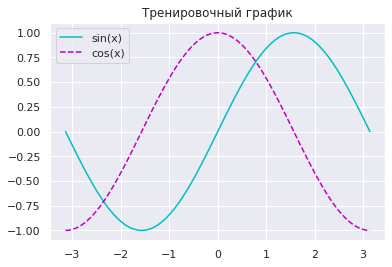

In [181]:
plt.title('Тренировочный график')

plt.plot(np.linspace(-np.pi, np.pi, 100), np.sin(np.linspace(-np.pi, np.pi, 100)), '-c', label='sin(x)')
plt.plot(np.linspace(-np.pi, np.pi, 100), np.cos(np.linspace(-np.pi, np.pi, 100)), '--m', label='cos(x)')

plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

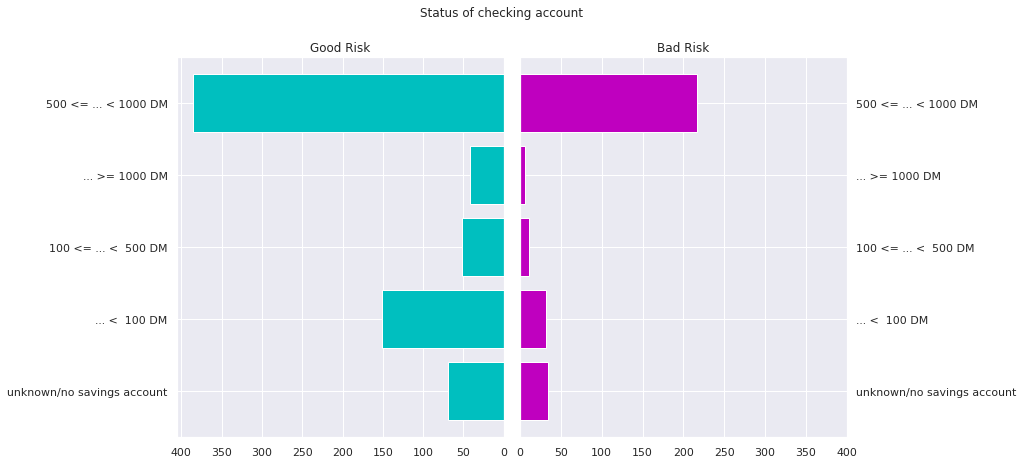

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=True,)
plt.suptitle('Status of checking account')
axes[0].set(title='Good Risk')
axes[1].set(title='Bad Risk')
axes[0].invert_xaxis()

axes[1].set_xlim((0, 400))
axes[1].barh(data['savings'].unique(), data[data['credit_risk'] == 'bad'].groupby('savings')['credit_risk'].count(), color='m')
axes[1].tick_params(labelright='on')
axes[0].barh(data['savings'].unique(), data[data['credit_risk'] == 'good'].groupby('savings')['credit_risk'].count(), color='c')
plt.subplots_adjust(wspace=0.05)


#### Вывод:
Большую часть кредитов всё же возращают: это верно как для общекго количества кредитов, так и для каждого уровня сбережений.

### Задание 8  (0.5 балла)

In [183]:
import seaborn as sns
sns.set_theme(palette=sns.color_palette("husl", 1))

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

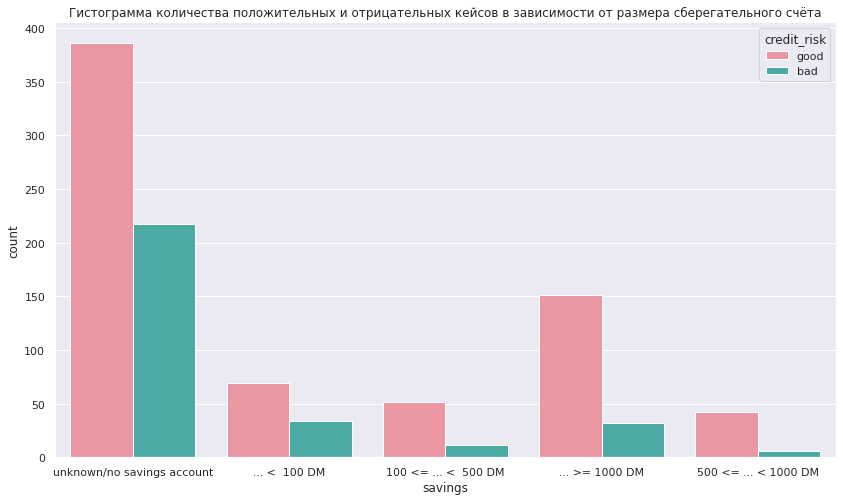

In [184]:
fig = plt.figure(figsize=(14, 8))
plt.title('Гистограмма количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта')
sns.countplot(data=data, x='savings', hue='credit_risk', )

Касательно построения: Так значительно лучше!!! Проще задать параметры и, лично для меня, стлбцы диаграммы проще сравнить, когда они рядом.


#### Вывод:

Можно видеть, что большая часть заёмщиков не имеют текущего счёта или не предоставили информации о нём, вторыми же активности заёмщиками оказались люди с максимальными накоплениями. Соотношение же плохих случаев к хорошим максимально (худший вариант) при отсутствующих накоплениях второе место занимают заёмщики с малыми накопленияхтекущими счетами(< 100 DM').

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

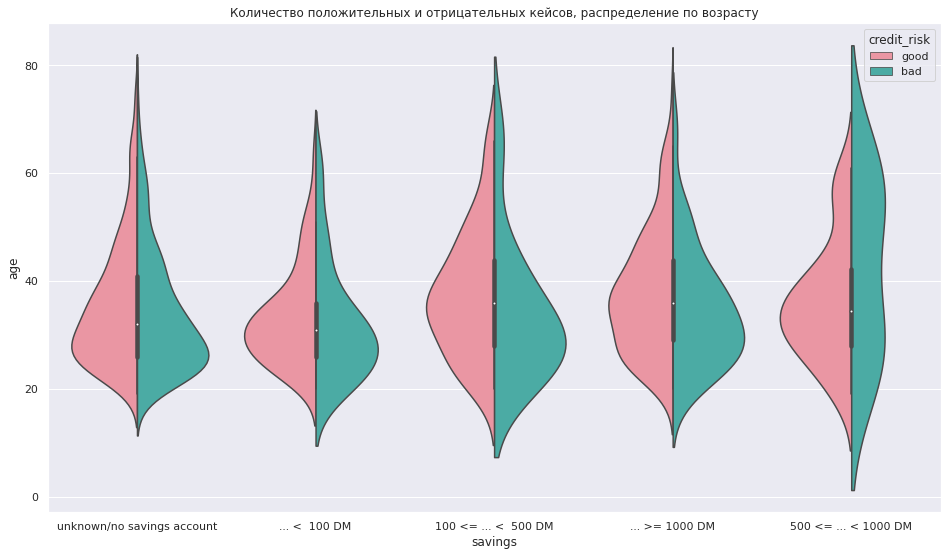

In [186]:
fig = plt.figure(figsize=(16, 9))
plt.title('Количество положительных и отрицательных кейсов, распределение по возрасту')
sns.violinplot(y='age', x='savings', hue='credit_risk', split=True, data=data, colors=sns.color_palette('Set2'))

#### Вывод:
В случае с отсутствующими/неизвестными сбережениями распределения по возростам более всего напоминает f-распределение (возмо, потому что эта группа исходя из предыдущих диаграмм ниболее представительна), менее же всего на f-распределение, а именно наиболее равномерно, - группа не вернувших кредит заёмщиков со счётом от 500 до 1000 марок, таких наблюдений минимальное количество. В целом же, при возрастании накомнений до 500 марок, видно что наибольшее количество кейсов разного типа размежевываются в плане возраста: они примерно совпадают для людей с отсутствующими/неизвестными сбережениями, а вот для случая от 100 до 500 марок можно заметить что удачные кейсы тяготеют к третьему десятку, а неудачные ко второму.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

Text(0.5, 0.98, 'Распределение положительных и отрицательных кейсов по возрастам')

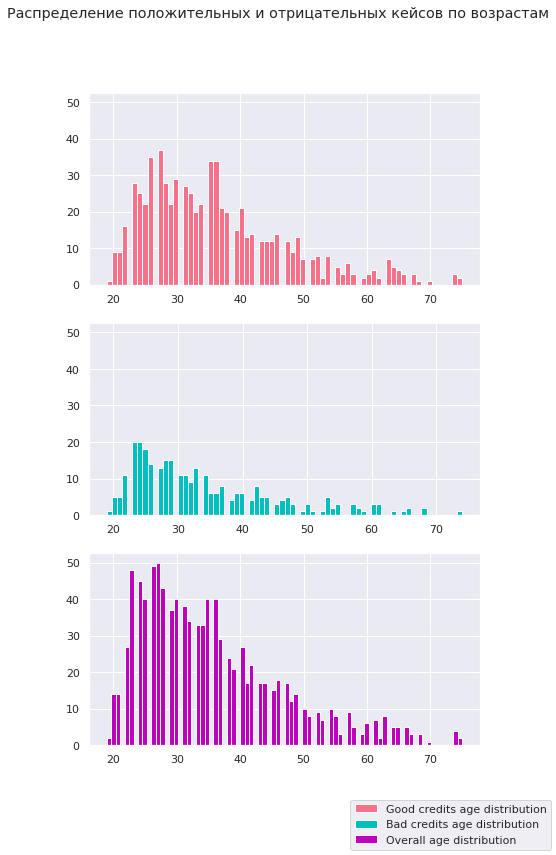

In [187]:
fig, axes = plt.subplots(len(data['credit_risk'].unique()) + 1, 1, sharey=True)
fig.set_figheight(12)
fig.set_figwidth(7)
axes[0].hist(data=data[data['credit_risk'] == 'good'], x='age', label='Good credits age distribution', bins=70)
axes[1].hist(data=data[data['credit_risk'] == 'bad'], x='age', label='Bad credits age distribution', color='c', bins=70)
axes[2].hist(data=data, x='age', label='Overall age distribution', color='m', bins=80)
fig.legend(loc='lower right')
fig.suptitle('Распределение положительных и отрицательных кейсов по возрастам')

#### Вывод:
Видно, что независимо от успешнеости кейса количество кредитов выданных представителям разных возрастов напоминает F-распределение. 

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0.5, 1.0, 'Диаграмма рассеяния')

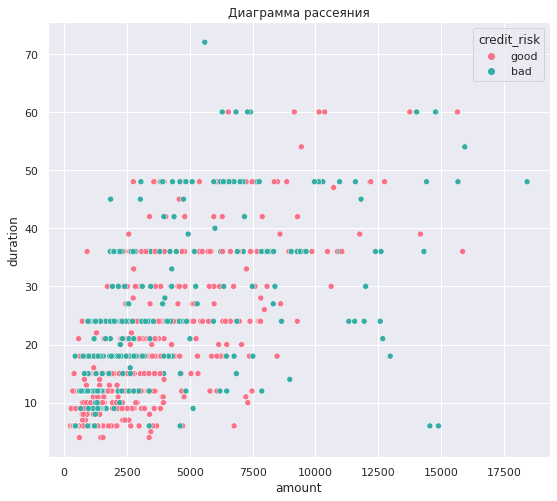

In [188]:
fig = plt.figure(figsize=(9, 8))
sns.scatterplot(y='duration', x='amount', data=data, hue='credit_risk')
plt.title('Диаграмма рассеяния')

#### Вывод:
Интересно, что заёмы сгруппированы по продолжительности(длинные параллельные линнии): вероятно, это стандартные предложения банка. Кредиты более 7500 марок встречаются реже, а в случае с меньшими похоже, что зелёных(неудачных) меток больше выше главной диагонали, то есть меньшие деньги на больший срок может оказаться давать в заём опаснее.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

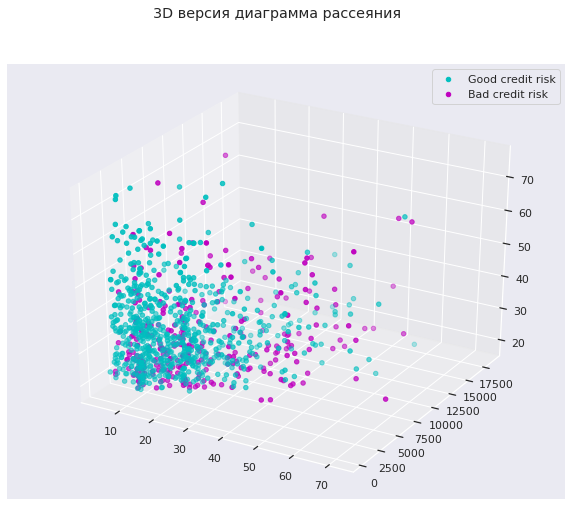

In [189]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('3D версия диаграмма рассеяния')
ax = fig.add_subplot(projection='3d')
data_good, data_bad = data[data['credit_risk'] == 'good'], data[data['credit_risk'] == 'bad']
ax.scatter3D(data_good['duration'], data_good['amount'], data_good['age'], c='c', label='Good credit risk')
ax.scatter3D(data_bad['duration'], data_bad['amount'], data_bad['age'], c='m', label='Bad credit risk')
ax.legend()


In [190]:
import plotly.express as px

In [191]:
fig = px.scatter_3d(data, x='amount', y='age', z='duration', color='credit_risk', title='3D диаграмма рассеивания')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

####Вывод:

В основном в кредит берётся сравнительно небольшое количество и на непродолжительный срок, в то время как длительные и/или значительные заёмы чаще не были возращены. Такие заёмы более свойственны людям до 40 лет. Пожилые же заёмщики обычно берут деньги на незначительный срок и возращают кредиты.   

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [192]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_expanded = pd.merge(data[data.select_dtypes('int').columns.values], data[data.select_dtypes('object').columns.values].apply(le.fit_transform), left_index=True, right_index=True)

In [202]:
data_expanded

duration  amount  age  ...  telephone  foreign_worker  credit_risk
0           2       0    0  ...          0               0            1
1           0       1    3  ...          0               0            1
2           1       0    0  ...          0               0            1
3           1       1    3  ...          0               1            1
4           1       1    3  ...          0               1            1
..        ...     ...  ...  ...        ...             ...          ...
995         2       0    0  ...          0               0            0
996         2       1    4  ...          0               0            0
997         2       6    1  ...          1               0            0
998         1       3    5  ...          1               0            0
999         3       3    2  ...          0               0            0

[1000 rows x 21 columns]

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = data_expanded.drop('credit_risk', 1).values
y = data_expanded['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train

array([[  15, 3343,   28, ...,    0,    1,    0],
       [  24, 6419,   44, ...,    1,    1,    0],
       [  20, 4272,   24, ...,    0,    0,    0],
       ...,
       [  24, 2303,   45, ...,    0,    0,    0],
       [  24, 5103,   47, ...,    0,    1,    0],
       [  22, 2675,   40, ...,    0,    0,    0]])

In [195]:
import numpy.linalg as LA

In [196]:
def predict(Xtest: np.array, Xtrain, n=20) -> np.array:
  # Попробуем воссоздать kNN
    dists = [LA.norm(Xtrain - Xtest[k], axis=1) for k in range(len(Xtest))]
    ans = pd.DataFrame(np.sum(np.take(Xtrain, [np.argsort(dot)[-n:] for dot in dists], axis=0)[:, :, -1], axis=1), columns=['score'])
    return ans['score'].apply(lambda x: 1 if (x < n / 2) else 0).values


# Подберем количество соседей
predict(X_test, X_train)
for n in range(1, 20):
  print(f"При n={n} accuracy = {accuracy_score(y_test, predict(X_test, X_train, n))}")
  

При n=1 accuracy = 0.66
При n=2 accuracy = 0.66
При n=3 accuracy = 0.66
При n=4 accuracy = 0.66
При n=5 accuracy = 0.66
При n=6 accuracy = 0.66
При n=7 accuracy = 0.66
При n=8 accuracy = 0.66
При n=9 accuracy = 0.66
При n=10 accuracy = 0.66
При n=11 accuracy = 0.66
При n=12 accuracy = 0.66
При n=13 accuracy = 0.66
При n=14 accuracy = 0.66
При n=15 accuracy = 0.66
При n=16 accuracy = 0.66
При n=17 accuracy = 0.66
При n=18 accuracy = 0.66
При n=19 accuracy = 0.66


In [197]:
for n in range(20, 1001, 20):
  print(f"При n={n} accuracy = {accuracy_score(y_test, predict(X_test, X_train, n))}")

При n=20 accuracy = 0.66
При n=40 accuracy = 0.66
При n=60 accuracy = 0.66
При n=80 accuracy = 0.66
При n=100 accuracy = 0.66
При n=120 accuracy = 0.66
При n=140 accuracy = 0.66
При n=160 accuracy = 0.66
При n=180 accuracy = 0.66
При n=200 accuracy = 0.66
При n=220 accuracy = 0.66
При n=240 accuracy = 0.66
При n=260 accuracy = 0.66
При n=280 accuracy = 0.66
При n=300 accuracy = 0.66
При n=320 accuracy = 0.66
При n=340 accuracy = 0.66
При n=360 accuracy = 0.66
При n=380 accuracy = 0.66
При n=400 accuracy = 0.66
При n=420 accuracy = 0.66
При n=440 accuracy = 0.66
При n=460 accuracy = 0.66
При n=480 accuracy = 0.66
При n=500 accuracy = 0.66
При n=520 accuracy = 0.66
При n=540 accuracy = 0.66
При n=560 accuracy = 0.66
При n=580 accuracy = 0.66
При n=600 accuracy = 0.66
При n=620 accuracy = 0.66
При n=640 accuracy = 0.66
При n=660 accuracy = 0.66
При n=680 accuracy = 0.66
При n=700 accuracy = 0.66
При n=720 accuracy = 0.66
При n=740 accuracy = 0.66
При n=760 accuracy = 0.66
При n=780 accura

#### Вывод:
Accuracy оставляет желать лучшего, одна из возможных причин - это разный масштаб признаков - попробуем привести к порядковым и числовые значения:

In [198]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_expanded['age'] = pd.cut(data_expanded['age'], 10)
data_expanded['duration'] = pd.cut(data_expanded['duration'], 10)
data_expanded[['age', 'duration']] = data_expanded[['age', 'duration']].apply(le.fit_transform)

data_expanded

duration  amount  age  ...  telephone  foreign_worker  credit_risk
0           2    1049    0  ...          0               0            1
1           0    2799    3  ...          0               0            1
2           1     841    0  ...          0               0            1
3           1    2122    3  ...          0               1            1
4           1    2171    3  ...          0               1            1
..        ...     ...  ...  ...        ...             ...          ...
995         2    1987    0  ...          0               0            0
996         2    2303    4  ...          0               0            0
997         2   12680    1  ...          1               0            0
998         1    6468    5  ...          1               0            0
999         3    6350    2  ...          0               0            0

[1000 rows x 21 columns]

In [199]:
def predict(Xtest: np.array, Xtrain, n=20) -> np.array:
    dists = [LA.norm(Xtrain - Xtest[k], axis=1) for k in range(len(Xtest))]
    ans = pd.DataFrame(np.sum(np.take(Xtrain, [np.argsort(dot)[-n:] for dot in dists], axis=0)[:, :, -1], axis=1), columns=['score'])
    return ans['score'].apply(lambda x: 1 if (x < n / 2) else 0).values


X = data_expanded.drop('credit_risk', 1).values
y = data_expanded['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train

for n in range(1, 20):
  print(f"При n={n} accuracy = {accuracy_score(y_test, predict(X_test, X_train, n))}")

При n=1 accuracy = 0.66
При n=2 accuracy = 0.66
При n=3 accuracy = 0.66
При n=4 accuracy = 0.66
При n=5 accuracy = 0.66
При n=6 accuracy = 0.66
При n=7 accuracy = 0.66
При n=8 accuracy = 0.66
При n=9 accuracy = 0.66
При n=10 accuracy = 0.66
При n=11 accuracy = 0.66
При n=12 accuracy = 0.66
При n=13 accuracy = 0.66
При n=14 accuracy = 0.66
При n=15 accuracy = 0.66
При n=16 accuracy = 0.66
При n=17 accuracy = 0.66
При n=18 accuracy = 0.66
При n=19 accuracy = 0.66


In [200]:
data_expanded.head()

duration  amount  age  ...  telephone  foreign_worker  credit_risk
0         2    1049    0  ...          0               0            1
1         0    2799    3  ...          0               0            1
2         1     841    0  ...          0               0            1
3         1    2122    3  ...          0               1            1
4         1    2171    3  ...          0               1            1

[5 rows x 21 columns]

In [203]:
data_expanded['amount'] = pd.cut(data_expanded['amount'], 10)
data_expanded[['amount']] = data_expanded[['amount']].apply(le.fit_transform)

X = data_expanded.drop('credit_risk', 1).values
y = data_expanded['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

for n in range(1, 20):
  print(f"При n={n} accuracy = {accuracy_score(y_test, predict(X_test, X_train, n))}")

for n in range(20, 1001, 20):
  print(f"При n={n} accuracy = {accuracy_score(y_test, predict(X_test, X_train, n))}")

При n=1 accuracy = 0.66
При n=2 accuracy = 0.652
При n=3 accuracy = 0.66
При n=4 accuracy = 0.664
При n=5 accuracy = 0.66
При n=6 accuracy = 0.66
При n=7 accuracy = 0.66
При n=8 accuracy = 0.66
При n=9 accuracy = 0.66
При n=10 accuracy = 0.66
При n=11 accuracy = 0.66
При n=12 accuracy = 0.66
При n=13 accuracy = 0.66
При n=14 accuracy = 0.66
При n=15 accuracy = 0.66
При n=16 accuracy = 0.66
При n=17 accuracy = 0.66
При n=18 accuracy = 0.66
При n=19 accuracy = 0.66
При n=20 accuracy = 0.66
При n=40 accuracy = 0.66
При n=60 accuracy = 0.66
При n=80 accuracy = 0.66
При n=100 accuracy = 0.66
При n=120 accuracy = 0.66
При n=140 accuracy = 0.66
При n=160 accuracy = 0.66
При n=180 accuracy = 0.66
При n=200 accuracy = 0.66
При n=220 accuracy = 0.66
При n=240 accuracy = 0.66
При n=260 accuracy = 0.66
При n=280 accuracy = 0.66
При n=300 accuracy = 0.66
При n=320 accuracy = 0.66
При n=340 accuracy = 0.66
При n=360 accuracy = 0.66
При n=380 accuracy = 0.66
При n=400 accuracy = 0.66
При n=420 accura

#### Вывод:
Мало что изменилось, но удолось поднять accuracy до 0.664 при k = 4